In [2]:
# importing some necessary libraries
import numpy as np
from PIL import Image
import glob
from sklearn.model_selection import train_test_split

# i used glob library for keep relative paths of images
battery_list = glob.glob('DM_dataset_hw1/battery/*.bmp')
dc_volt_src_list = glob.glob('DM_dataset_hw1/dc_volt_src/*.bmp')
diode_list = glob.glob('DM_dataset_hw1/diode/*.bmp')
gnd_list = glob.glob('DM_dataset_hw1/gnd/*.bmp')
inductor_list = glob.glob('DM_dataset_hw1/inductor/*.bmp')
resistor_list = glob.glob('DM_dataset_hw1/resistor/*.bmp')
voltmeter_list = glob.glob('DM_dataset_hw1/voltmeter/*.bmp')

In [3]:
# then, defined a function I used that for image resizing process
def image_list_resizer(image_list):
        for idx, x in enumerate(image_list):
            image = Image.open(image_list[idx]).convert("L")
            image = image.resize((28,28))
            image_list[idx] = image

image_list_resizer(battery_list)
image_list_resizer(dc_volt_src_list)
image_list_resizer(diode_list)
image_list_resizer(gnd_list)
image_list_resizer(inductor_list)
image_list_resizer(resistor_list)
image_list_resizer(voltmeter_list)

In [3]:
# there are existing some images what their mode is RGB. so I used convert("L") method to convert gray mode. 
# and testing these images 

In [4]:
# and i define a new function for normalization process and transform images to 1 dimension array

def image_to_array(image_list):
    for idx, x in enumerate(image_list):
        image = image_list[idx]
        image = np.array(image)
        image_flattened = image.flatten()
        image_normalized = image_flattened / 255
        image_list[idx] = image_normalized

image_to_array(battery_list)
image_to_array(dc_volt_src_list)
image_to_array(diode_list)
image_to_array(gnd_list)
image_to_array(inductor_list)
image_to_array(resistor_list)
image_to_array(voltmeter_list)

In [5]:
from sklearn.model_selection import StratifiedKFold

all_images = np.vstack((battery_list, dc_volt_src_list, diode_list, gnd_list, inductor_list, resistor_list, voltmeter_list))
all_labels = np.array([0] * len(battery_list) + [1] * len(dc_volt_src_list) + [2] * len(diode_list) + [3] * len(gnd_list) + [4] * len(inductor_list) + [5] * len(resistor_list) + [6] * len(voltmeter_list))

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(all_images, all_labels):
    X_train, X_test = all_images[train_index], all_images[test_index]
    y_train, y_test = all_labels[train_index], all_labels[test_index]

In [7]:
# it worked correctly because in my previous works, inductor_list[8] indexed numpy array had RGB mode and its array length was 2352. So I am assuming it works correctly now.

# then I used 5 Fold Cross validation seperate set to train test splits.

In [8]:
# and i started with knn to training process


Distance Metric: euclidean

Number of Neighbors (k): 3


C:\Users\atahi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\atahi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Accuracy: 0.7096
Precision: 0.7370
Recall: 0.7096
F-Measure: 0.7049
Training Time: 0.0026 seconds
Testing Time: 0.4942 seconds


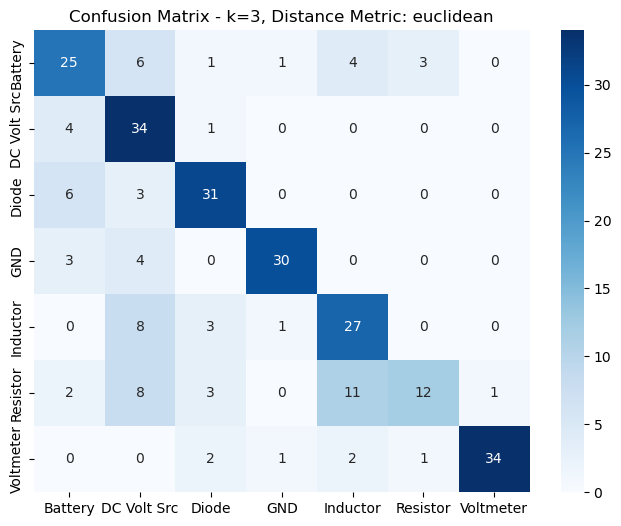


Number of Neighbors (k): 5
Accuracy: 0.7132
Precision: 0.7606
Recall: 0.7132
F-Measure: 0.7101
Training Time: 0.0047 seconds
Testing Time: 0.0966 seconds


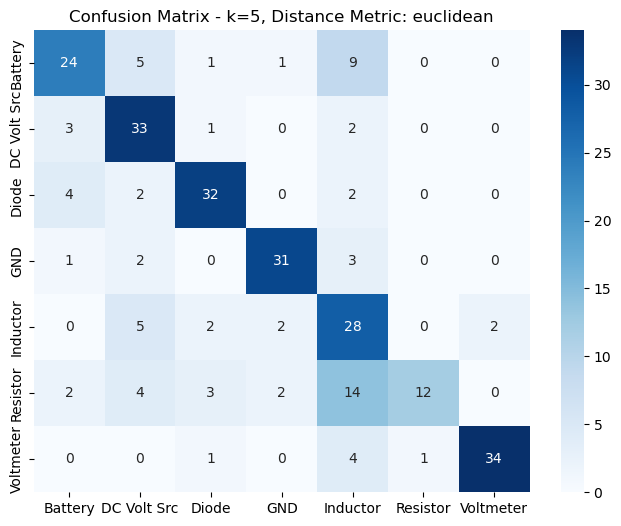


Number of Neighbors (k): 7
Accuracy: 0.6618
Precision: 0.7125
Recall: 0.6618
F-Measure: 0.6581
Training Time: 0.0000 seconds
Testing Time: 0.1103 seconds


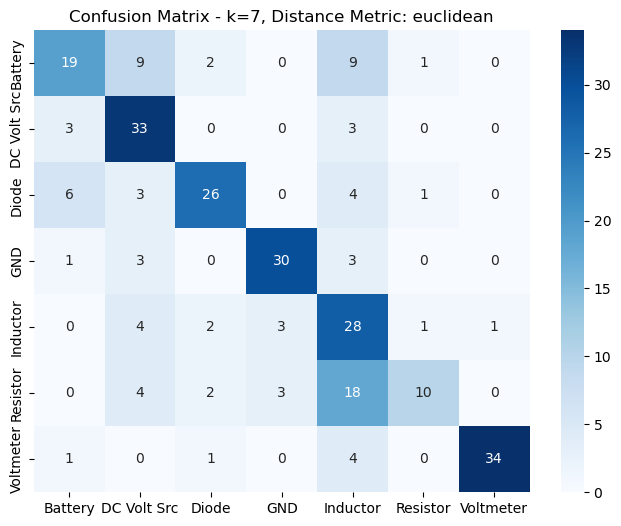


Distance Metric: minkowski

Number of Neighbors (k): 3
Accuracy: 0.7096
Precision: 0.7370
Recall: 0.7096
F-Measure: 0.7049
Training Time: 0.0047 seconds
Testing Time: 0.0848 seconds


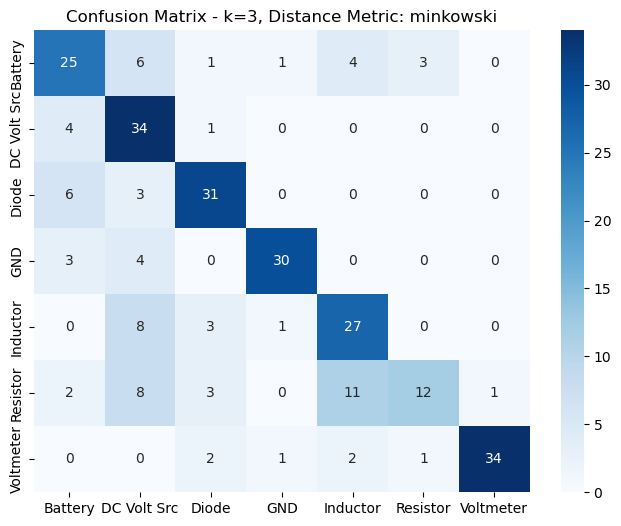


Number of Neighbors (k): 5
Accuracy: 0.7132
Precision: 0.7606
Recall: 0.7132
F-Measure: 0.7101
Training Time: 0.0000 seconds
Testing Time: 0.0871 seconds


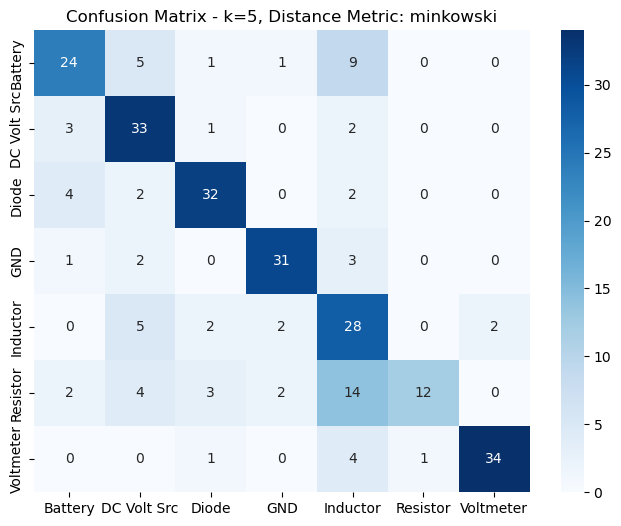


Number of Neighbors (k): 7
Accuracy: 0.6618
Precision: 0.7125
Recall: 0.6618
F-Measure: 0.6581
Training Time: 0.0037 seconds
Testing Time: 0.0846 seconds


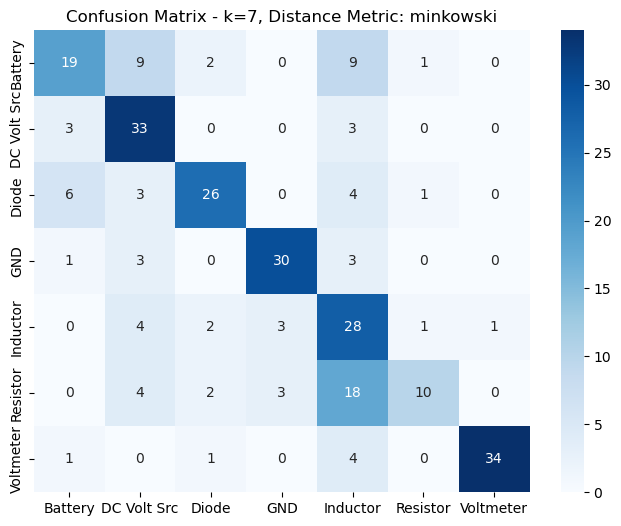

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# i defined k values
k_values = [3, 5, 7]

# i selected the minkowski distance for the second one.
distance_metrics = ['euclidean','minkowski']

for distance_metric in distance_metrics:
    print(f"\nDistance Metric: {distance_metric}")

    for k in k_values:
        print(f"\nNumber of Neighbors (k): {k}")

        # classifying process
        knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)

        # measure training time calculating
        start_time = time.time()
        knn_classifier.fit(X_train, y_train)
        training_time = time.time() - start_time

        # make predictions on the test set
        start_time = time.time()
        y_pred = knn_classifier.predict(X_test)
        testing_time = time.time() - start_time

        # calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # print metrics
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F-Measure: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds")
        print(f"Testing Time: {testing_time:.4f} seconds")

        # confusion matrix of classifying
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Battery', 'DC Volt Src', 'Diode', 'GND', 'Inductor', 'Resistor', 'Voltmeter'], yticklabels=['Battery', 'DC Volt Src', 'Diode', 'GND', 'Inductor', 'Resistor', 'Voltmeter'])
        plt.title(f"Confusion Matrix - k={k}, Distance Metric: {distance_metric}")
        plt.show()
  

In [2]:
# importing some necessary libraries
import numpy as np
from PIL import Image
import glob
from sklearn.model_selection import train_test_split

# i used glob library for keep relative paths of images
battery_list = glob.glob('DM_dataset_hw1/battery/*.bmp')
dc_volt_src_list = glob.glob('DM_dataset_hw1/dc_volt_src/*.bmp')
diode_list = glob.glob('DM_dataset_hw1/diode/*.bmp')
gnd_list = glob.glob('DM_dataset_hw1/gnd/*.bmp')
inductor_list = glob.glob('DM_dataset_hw1/inductor/*.bmp')
resistor_list = glob.glob('DM_dataset_hw1/resistor/*.bmp')
voltmeter_list = glob.glob('DM_dataset_hw1/voltmeter/*.bmp')

In [3]:
# then, defined a function I used that for image resizing process
def image_list_resizer(image_list):
        for idx, x in enumerate(image_list):
            image = Image.open(image_list[idx]).convert("L")
            image = image.resize((28,28))
            image_list[idx] = image

image_list_resizer(battery_list)
image_list_resizer(dc_volt_src_list)
image_list_resizer(diode_list)
image_list_resizer(gnd_list)
image_list_resizer(inductor_list)
image_list_resizer(resistor_list)
image_list_resizer(voltmeter_list)

In [4]:
# there are existing some images what their mode is RGB. so I used convert("L") method to convert gray mode. 
# and testing these images 

In [5]:
# and i defined a new function for normalization process and transform images to 1 dimension array

def image_to_array(image_list):
    for idx, x in enumerate(image_list):
        image = image_list[idx]
        image = np.array(image)
        image_flattened = image.flatten()
        image_normalized = image_flattened / 255
        image_list[idx] = image_normalized

image_to_array(battery_list)
image_to_array(dc_volt_src_list)
image_to_array(diode_list)
image_to_array(gnd_list)
image_to_array(inductor_list)
image_to_array(resistor_list)
image_to_array(voltmeter_list)

In [6]:
from sklearn.model_selection import StratifiedKFold

all_images = np.vstack((battery_list, dc_volt_src_list, diode_list, gnd_list, inductor_list, resistor_list, voltmeter_list))
all_labels = np.array([0] * len(battery_list) + [1] * len(dc_volt_src_list) + [2] * len(diode_list) + [3] * len(gnd_list) + [4] * len(inductor_list) + [5] * len(resistor_list) + [6] * len(voltmeter_list))

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(all_images, all_labels):
    X_train, X_test = all_images[train_index], all_images[test_index]
    y_train, y_test = all_labels[train_index], all_labels[test_index]

In [7]:
# it worked correctly because in my previous works, inductor_list[8] indexed numpy array had RGB mode and its array length was 2352. So I am assuming it works correctly now.

# then I used 5 Fold Cross validation seperate set to train test splits.


Distance Metric: euclidean

Number of Neighbors (k): 3
Accuracy: 0.7096
Precision: 0.7370
Recall: 0.7096
F-Measure: 0.7049
Training Time: 0.00342 seconds
Testing Time: 0.10309 seconds


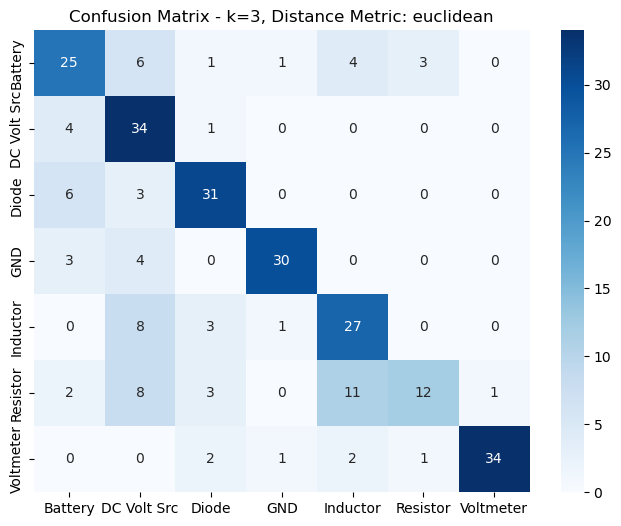


Number of Neighbors (k): 5
Accuracy: 0.7132
Precision: 0.7606
Recall: 0.7132
F-Measure: 0.7101
Training Time: 0.00337 seconds
Testing Time: 0.09633 seconds


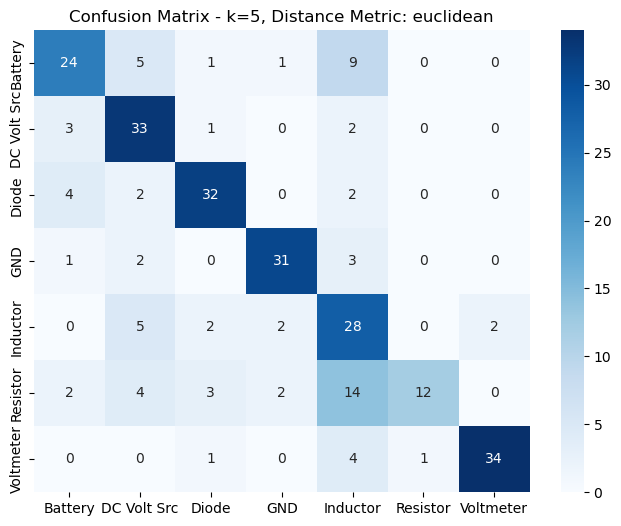


Number of Neighbors (k): 7
Accuracy: 0.6618
Precision: 0.7125
Recall: 0.6618
F-Measure: 0.6581
Training Time: 0.00573 seconds
Testing Time: 0.09728 seconds


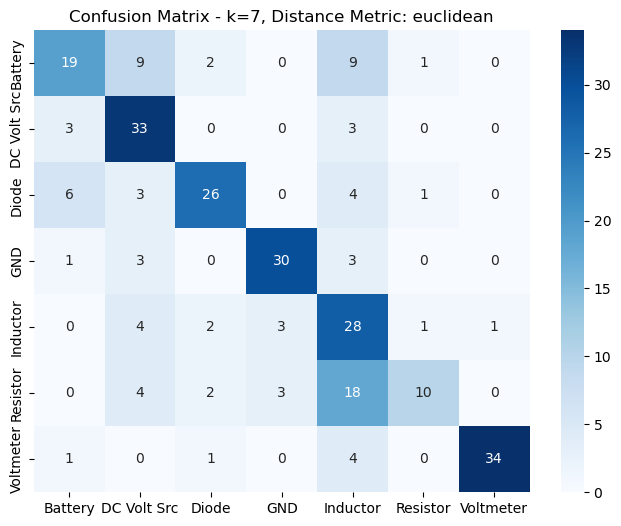


Distance Metric: minkowski

Number of Neighbors (k): 3
Accuracy: 0.7096
Precision: 0.7370
Recall: 0.7096
F-Measure: 0.7049
Training Time: 0.00455 seconds
Testing Time: 0.06938 seconds


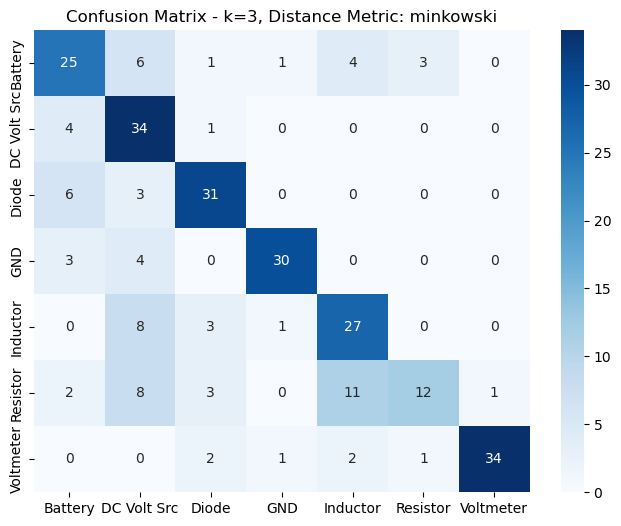


Number of Neighbors (k): 5
Accuracy: 0.7132
Precision: 0.7606
Recall: 0.7132
F-Measure: 0.7101
Training Time: 0.00054 seconds
Testing Time: 0.07787 seconds


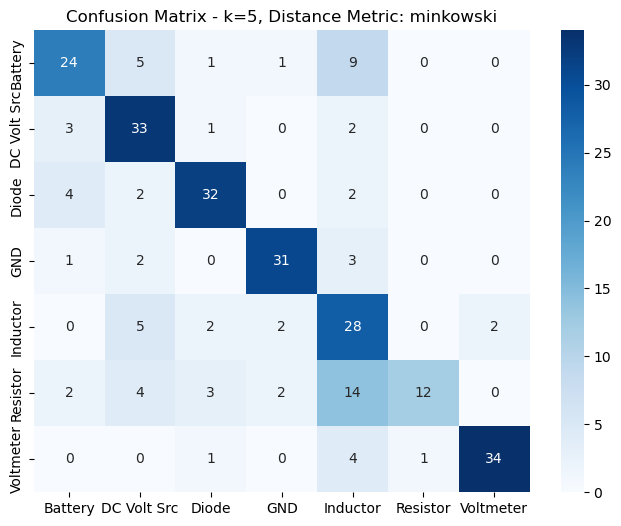


Number of Neighbors (k): 7
Accuracy: 0.6618
Precision: 0.7125
Recall: 0.6618
F-Measure: 0.6581
Training Time: 0.00394 seconds
Testing Time: 0.07997 seconds


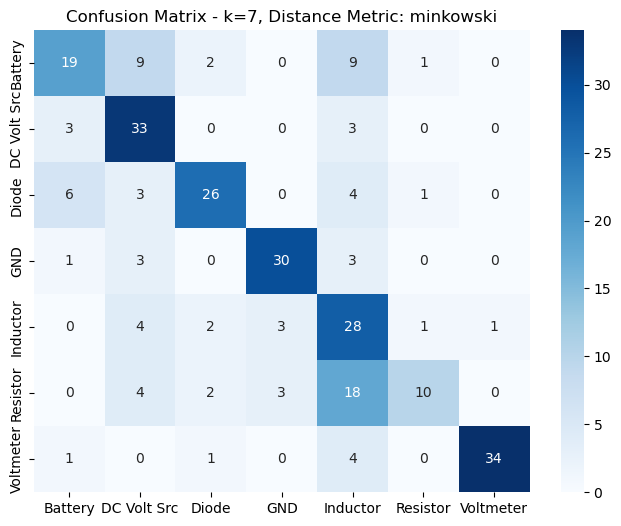

In [13]:
# and i started with knn to training process

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# i defined k values
k_values = [3, 5, 7]

# i selected the minkowski distance for the second one.
distance_metrics = ['euclidean','minkowski']

for distance_metric in distance_metrics:
    print(f"\nDistance Metric: {distance_metric}")

    for k in k_values:
        print(f"\nNumber of Neighbors (k): {k}")

        # classifying process
        knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)

        # measure training time calculating
        start_time = time.time()
        knn_classifier.fit(X_train, y_train)
        training_time = time.time() - start_time

        # make predictions on the test set
        start_time = time.time()
        y_pred = knn_classifier.predict(X_test)
        testing_time = time.time() - start_time

        # calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # print metrics
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F-Measure: {f1:.4f}")
        print(f"Training Time: {training_time:.5f} seconds")
        print(f"Testing Time: {testing_time:.5f} seconds")

        # confusion matrix of classifying
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Battery', 'DC Volt Src', 'Diode', 'GND', 'Inductor', 'Resistor', 'Voltmeter'], yticklabels=['Battery', 'DC Volt Src', 'Diode', 'GND', 'Inductor', 'Resistor', 'Voltmeter'])
        plt.title(f"Confusion Matrix - k={k}, Distance Metric: {distance_metric}")
        plt.show()
  

Criterion: gini
Accuracy: 0.5441
Precision: 0.5439
Recall: 0.5441
F1 Score: 0.5410
Training Time: 0.7081 seconds
Testing Time: 0.0046 seconds


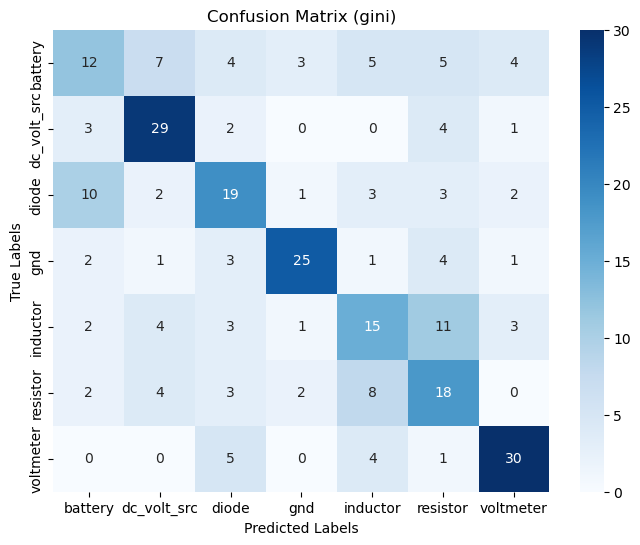

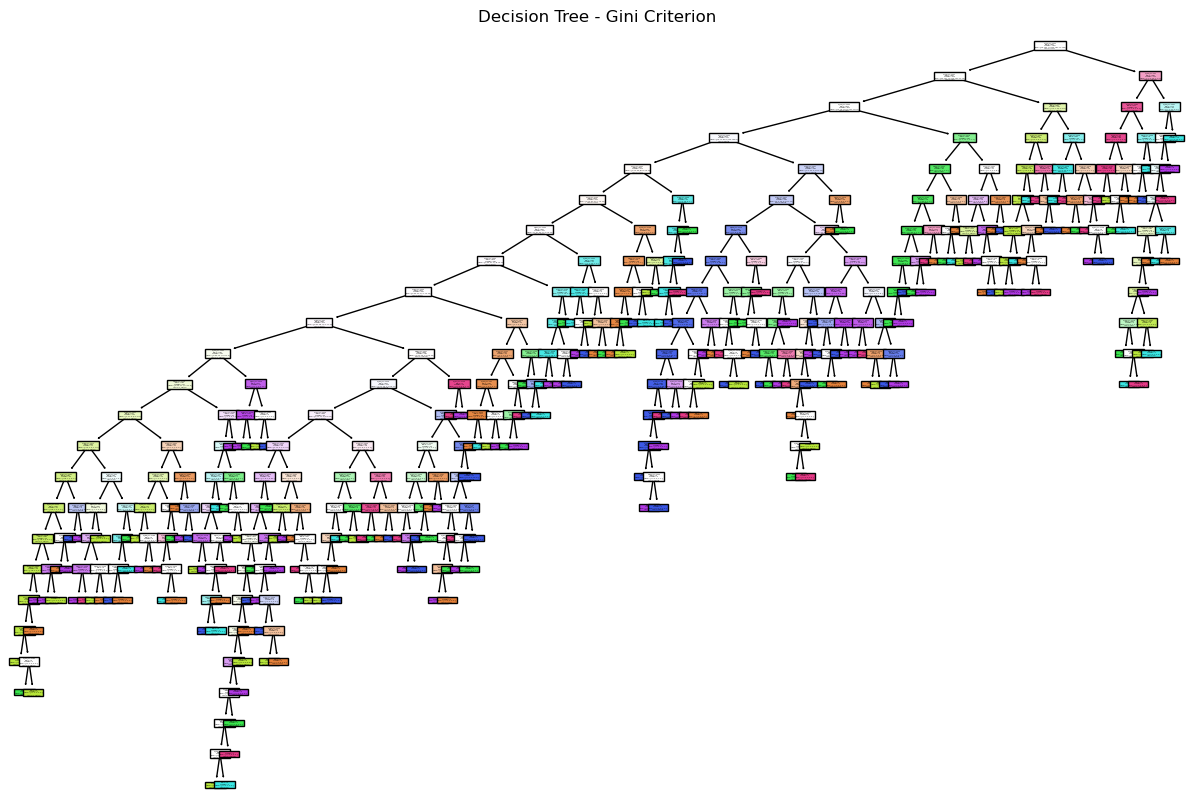

Criterion: entropy
Accuracy: 0.5368
Precision: 0.5402
Recall: 0.5368
F1 Score: 0.5355
Training Time: 0.9898 seconds
Testing Time: 0.0031 seconds


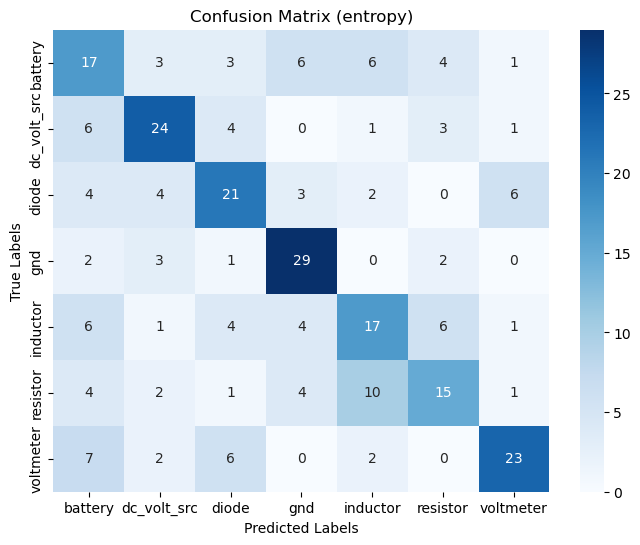

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# i defined a function that makes training for decision tree gini and entropy. Then printing all metrics and draws confusion matrix and decision tree for gini.
def train_evaluate_decision_tree(X_train, y_train, X_test, y_test, criterion):
    # Initialize Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(criterion=criterion, random_state=42)
    
    # training process and calculating training time
    start_time = time.time()
    dt_classifier.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # testing process and testing time calculating
    start_time = time.time()
    y_pred = dt_classifier.predict(X_test)
    testing_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # confusion matrix 
    cm = confusion_matrix(y_test, y_pred)

    # print metrics
    print(f"Criterion: {criterion}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Testing Time: {testing_time:.4f} seconds")

    # confusion matrix drawing
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['battery', 'dc_volt_src', 'diode', 'gnd', 'inductor', 'resistor', 'voltmeter'], yticklabels=['battery', 'dc_volt_src', 'diode', 'gnd', 'inductor', 'resistor', 'voltmeter'])
    plt.title(f"Confusion Matrix ({criterion})")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # gini index decision tree drawing
    if criterion == 'gini':
        plt.figure(figsize=(15, 10))
        plot_tree(dt_classifier, filled=True, feature_names=None, class_names=['battery', 'dc_volt_src', 'diode', 'gnd', 'inductor', 'resistor', 'voltmeter'])
        plt.title("Decision Tree - Gini Criterion")
        plt.show()

# then calling function 2 times for gini and entropy

train_evaluate_decision_tree(X_train, y_train, X_test, y_test, criterion='gini')
train_evaluate_decision_tree(X_train, y_train, X_test, y_test, criterion='entropy')

Accuracy: 0.6029
Precision: 0.6377
Recall: 0.6029
F1 Score: 0.6017
Training Time: 0.0030 seconds
Testing Time: 0.0011 seconds


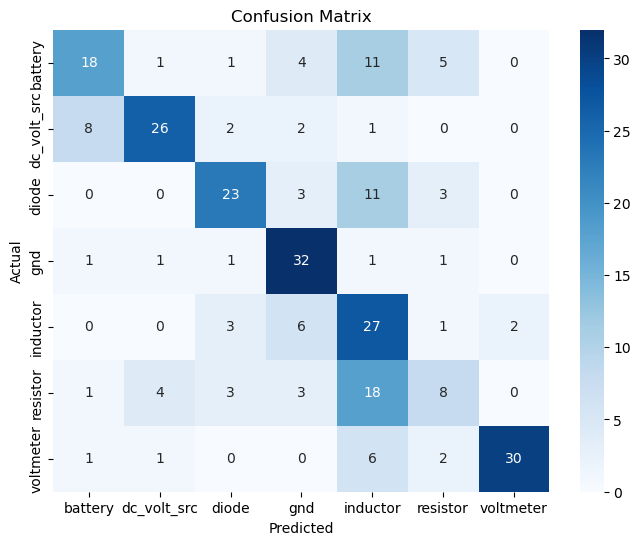

In [9]:
# naive bayes
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
from sklearn.naive_bayes import MultinomialNB


# create and train the naive bayes classifier and calculating training time
start_time = time.time()
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# making predictions here and calculating testing time
start_time = time.time()
y_pred = nb_classifier.predict(X_test)
test_time = time.time() - start_time

# metrics calculating here
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# printing metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {test_time:.4f} seconds")

# plot function draws confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['battery', 'dc_volt_src', 'diode', 'gnd', 'inductor', 'resistor', 'voltmeter'], yticklabels=['battery', 'dc_volt_src', 'diode', 'gnd', 'inductor', 'resistor', 'voltmeter'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.6397
Precision: 0.6409
Recall: 0.6397
F1 Score: 0.6367
Training Time: 0.1442 seconds
Testing Time: 0.0229 seconds


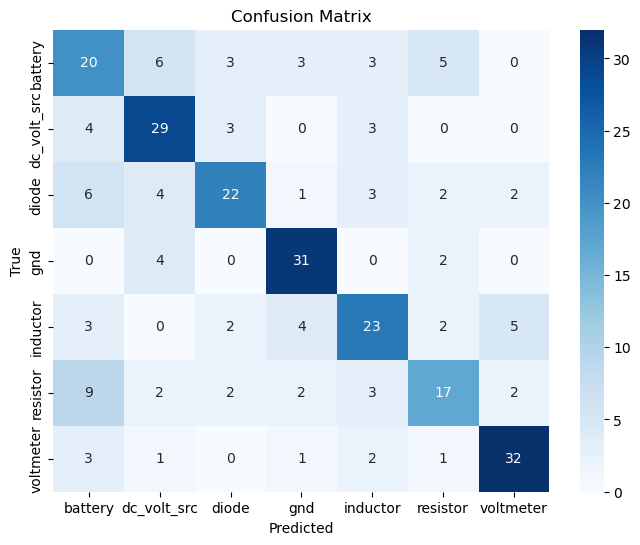

In [10]:
# svm

from sklearn.svm import SVC

# svm model creating
svm_model = SVC(kernel='linear', random_state=42)

# training process doing here and training_time calculating here.
start_time = time.time()
svm_model.fit(X_train, y_train)
training_time = time.time() - start_time

# predict using the trained model and calculating test time
start_time = time.time()
y_pred = svm_model.predict(X_test)
testing_time = time.time() - start_time

# calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# printing metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# plot draws the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['battery', 'dc_volt_src', 'diode', 'gnd', 'inductor', 'resistor', 'voltmeter'], yticklabels=['battery', 'dc_volt_src', 'diode', 'gnd', 'inductor', 'resistor', 'voltmeter'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()